In [1]:
import numpy as np
import pandas as pd
from numba import jit, njit
import time
import math
from matplotlib import pyplot as plt

In [48]:
def search_1_1(array, n):
    k = 0
    index = []
    k += 1
    k += 2
    for i in range(len(array)):
        k += 1
        if array[i] == n:
            k += 1
            index = i
            break
    if index == []:
        return None, k
    k += 1
    print(index)
    return index, k  

def search_1_1_while_block(array, n):
    array = np.append(array, n)
    index = 0
    k = 2
    while array[index] != array[-1]:
        index += 1
        k += 2
    k += 2
    if index > (len(array) - 1):
        return None, k
    print(index)
    return index, k 

def search_1_1_while(array, n):
    index = 0
    k = 1
    k += 4
    while array[index] != n and index <= (len(array) - 1):
        index += 1
        k += 6
    if index > (len(array) - 1):
        return None, k
    k += 2
    print(index)
    return index, k 

def search_2_1(array, n):
    index = []
    k = 1
    k += 2
    for i in range(len(array)):
        k += 1
        if array[i] == n:
            k += 1
            index = i
            break
        if array[i] > n:
            k += 1
            return None, k
    return index, k

# def search_2_2_rec(array, n, start=0, end='None'):
#     if end == 'None':
#         end = len(array) - 1
#     mid = (start + end) // 2 
#     if n == array[mid]:
#         return mid
#     if n < array[mid]:
#         return search_2_2(array, n, start, mid-1)
#     if n > array[mid]:
#         return search_2_2(array, n, mid+1, end)


def search_2_2(array, n): 
    start = 0 
    end = len(array) - 1 
    mid = (start + end) // 2
    k = 7  
    while array[mid] != n:
        k += 1
        if n > array[mid]:
            start = mid + 1
            mid = (start + end) // 2
            k += 5
        k += 1
        if n < array[mid]:
            end = mid - 1
            mid = (start + end) // 2
            k += 5
        k += 3
        if array[mid] != n and start == end:
            return None, k
    return (mid, k)

def blocks(array, n_blocks=10, size_blocks=None):
    size_blocks = len(array) // n_blocks
    k = 3
    blocks_list = np.zeros(n_blocks)
    k += n_blocks
    for i in range(blocks_list.size):
        blocks_list[i] += i * size_blocks
        k += 2
    blocks_list = np.append(blocks_list, len(array) - 1)
    k += 3
    blocks_list = blocks_list.tolist()
    blocks_list = list(map(int, blocks_list))
    return blocks_list, k
    
def search_2_3(array, n, n_block=10):
    blocks_list, k = blocks(array, n_block)
    k += 2
    k += 2
    for b in range(1, len(blocks_list)):
        k += 1
        if n < array[blocks_list[b]]:
            index, k_1 = search_1_1(array[blocks_list[b - 1]:blocks_list[b] + 1], n)
            k += k_1
            k += 4
            return (index + blocks_list[b - 1], k)
        k += 1
        if n == array[blocks_list[b]]:
            index = blocks_list[b]
            k += 1
            return (index, k)

In [3]:
table_k = pd.DataFrame(data=
                       {'LINEAR(non sorted)':[],
                        'LINEAR min time(non sorted)':[],
                        'LINEAR max time(non sorted)':[],
                        'BLOCK LINEAR(non sorted)':[],
                        'BLOCK LINEAR min time(non sorted)':[],
                        'BLOCK LINEAR max time(non sorted)':[],
                        'FAST LINEAR':[],
                        'FAST LINEAR min time':[],
                        'FAST LINEAR max time':[], 
                        'BINARY':[],
                        'BINARY min time':[],
                        'BINARY max time':[],
                        'BLOCKY':[],
                        'BLOCKY min time':[],
                        'BLOCKY max time':[]})
table_time = pd.DataFrame(data=
                       {'LINEAR(non sorted)':[],
                        'LINEAR min time(non sorted)':[],
                        'LINEAR max time(non sorted)':[],
                        'BLOCK LINEAR(non sorted)':[],
                        'BLOCK LINEAR min time(non sorted)':[],
                        'BLOCK LINEAR max time(non sorted)':[],
                        'FAST LINEAR':[],
                        'FAST LINEAR min time':[],
                        'FAST LINEAR max time':[], 
                        'BINARY':[],
                        'BINARY min time':[],
                        'BINARY max time':[],
                        'BLOCKY':[],
                        'BLOCKY min time':[],
                        'BLOCKY max time':[]})

1. Реализовать следующие алгоритмы поиска в неупорядоченном массиве: линейный; быстрый линейный (с барьером)

In [50]:
accuracy = []
for i in range(1000000, 15000001, 1000000):
    n = 50000
    index = np.random.randint(i, size=1)
    array_1_1 = np.random.randint(n - 1, size=i)
    array_1_1[index] = n
    s = time.time()
    index_1_1, k = search_1_1_while(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1] == n)
    table_k.loc[i, 'LINEAR(non sorted)'] = k
    table_time.loc[i, 'LINEAR(non sorted)'] = f - s

    n = 0
    array_1_1[0] = n
    s = time.time()
    index_1_1_min, k = search_1_1_while(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1_min] == n)
    table_k.loc[i, 'LINEAR min time(non sorted)'] = k
    table_time.loc[i, 'LINEAR min time(non sorted)'] = f - s

for i in range(1000000, 15000001, 1000000):
    n = 100
    array_1_1 = np.random.randint(n - 1, size=i)
    array_1_1[-1] = n
    s = time.time()
    index_1_1_max, k = search_1_1_while(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1_max] == n)
    table_k.loc[i, 'LINEAR max time(non sorted)'] = k
    table_time.loc[i, 'LINEAR max time(non sorted)'] = f - s
accuracy = np.array(accuracy)
accuracy.mean()


894055
0
1105219
0
669820
0
2726808
0
404800
0
4611016
0
4612125
0
7621759
0
175763
0
145132
0
7352244
0
10730272
0
6167240
0
7251488
0
14439702
0
999999
1999999
2999999
3999999
4999999
5999999
6999999
7999999
8999999
9999999
10999999
11999999
12999999
13999999
14999999


1.0

<Axes: >

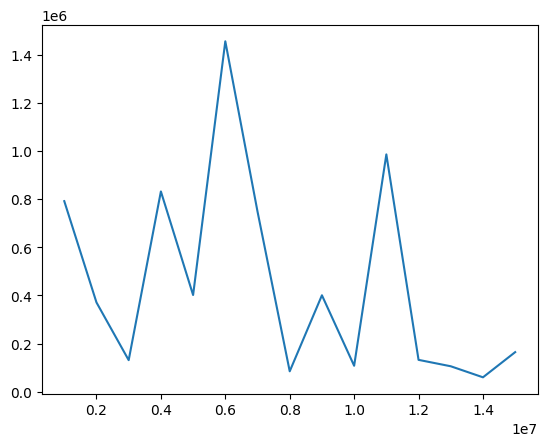

In [39]:
table_k.iloc[:, 0].plot()

<Axes: >

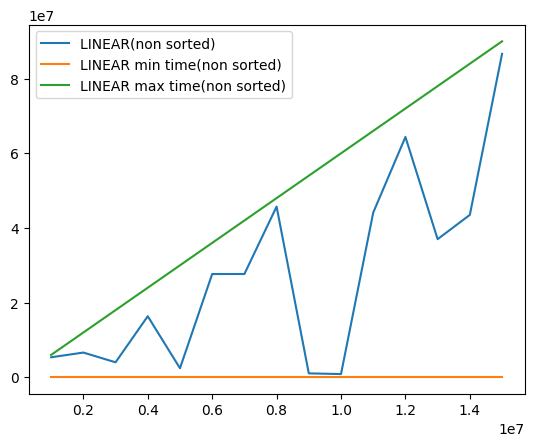

In [51]:
table_k.iloc[:, 0:3].plot()

<Axes: >

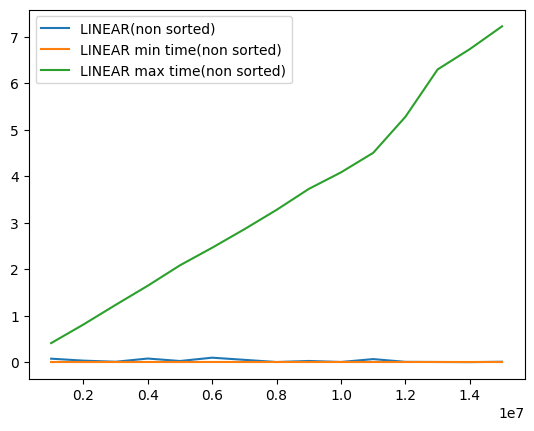

In [6]:
table_time.iloc[:, 0:3].plot()

Барьер

In [7]:
accuracy = []
for i in range(1000000, 15000001, 1000000):
    n = 5000
    array_1_1 = np.random.randint(100000, size=i)
    s = time.time()
    index_1_1, k = search_1_1_while_block(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1] == n)
    table_k.loc[i, 'BLOCK LINEAR(non sorted)'] = k
    table_time.loc[i, 'BLOCK LINEAR(non sorted)'] = f - s

    array_1_1[0] = n
    s = time.time()
    index_1_1_min, k = search_1_1_while_block(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1_min] == n)
    table_k.loc[i, 'BLOCK LINEAR min time(non sorted)'] = k
    table_time.loc[i, 'BLOCK LINEAR min time(non sorted)'] = f - s

for i in range(1000000, 15000001, 1000000):
    n = 100
    array_1_1 = np.random.randint(n - 1, size=i)
    array_1_1[-1] = n
    s = time.time()
    index_1_1_max, k = search_1_1_while_block(array_1_1, n)
    f = time.time()
    accuracy.append(array_1_1[index_1_1_max] == n)
    table_k.loc[i, 'BLOCK LINEAR max time(non sorted)'] = k
    table_time.loc[i, 'BLOCK LINEAR max time(non sorted)'] = f - s
accuracy = np.array(accuracy)
accuracy.mean()


1.0

<Axes: >

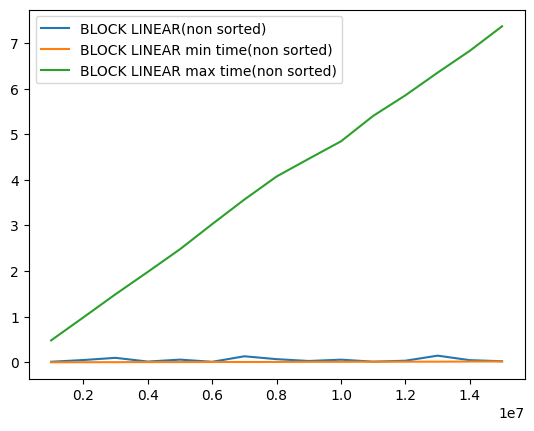

In [8]:
table_time.iloc[:, 3:6].plot()

Сравнение блочного и обычного

<Axes: >

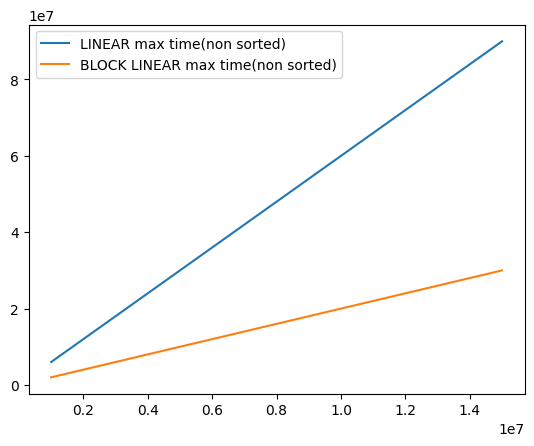

In [9]:
table_k.iloc[:, [2, 5]].plot()

<Axes: >

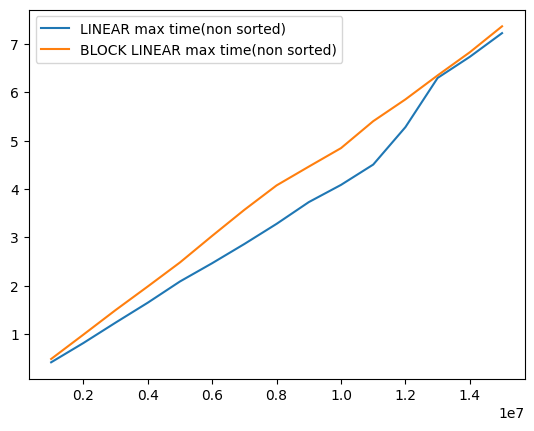

In [10]:
table_time.iloc[:, [2, 5]].plot()

2. Реализовать следующие алгоритмы поиска в упорядоченном массиве: быстрый линейный; бинарный; блочный (с различными размерами блоков).

Линейный

In [11]:
accuracy = []
for i in range(1000000, 15000001, 1000000):
    n = 100
    array_2_1 = np.random.randint(10000, size=i)
    array_2_1 = np.sort(array_2_1)
    s = time.time()
    index_2_1, k = search_2_1(array_2_1, n)
    f = time.time()
    accuracy.append(array_2_1[index_2_1] == n)
    table_k.loc[i, 'FAST LINEAR'] = k
    table_time.loc[i, 'FAST LINEAR'] = f - s

for i in range(1000000, 15000001, 1000000):
    n = 100
    array_2_1 = np.random.randint(n - 1, size=i)
    array_2_1 = np.sort(array_2_1)
    array_2_1[-1] = n
    s = time.time()
    index_2_1_max, k = search_2_1(array_2_1, n)
    f = time.time()
    accuracy.append(array_2_1[index_2_1_max] == n)
    table_k.loc[i, 'FAST LINEAR max time'] = k
    table_time.loc[i, 'FAST LINEAR max time'] = f - s

for i in range(1000000, 15000001, 1000000):
    n = 0
    array_2_1 = np.random.randint(low=n+1, high=(n+1)*1000, size=i)
    array_2_1 = np.sort(array_2_1)
    array_2_1[0] = n
    f = time.time()
    index_2_1_min, k = search_2_1(array_2_1, n)
    s = time.time()
    accuracy.append(array_2_1[index_2_1_min] == n)
    table_k.loc[i, 'FAST LINEAR min time'] = k
    table_time.loc[i, 'FAST LINEAR min time'] = f - s
accuracy = np.array(accuracy)
accuracy.mean()

1.0

<Axes: >

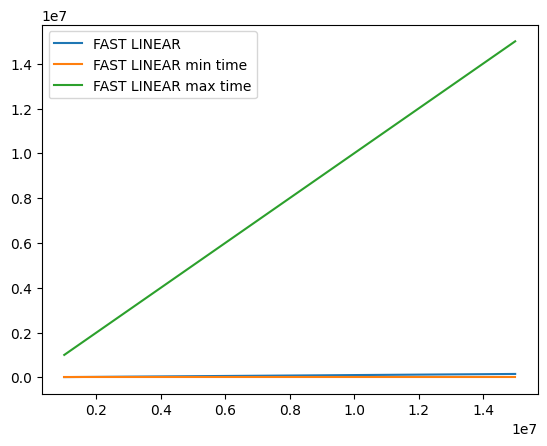

In [12]:
table_k.iloc[:, 6:9].plot()

<Axes: >

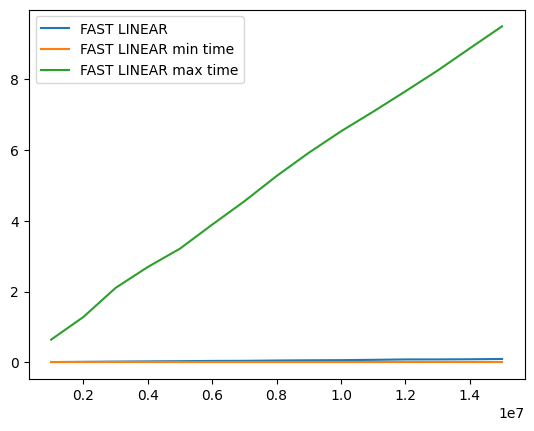

In [13]:
table_time.iloc[:, 6:9].plot()

Бинарный

In [14]:
# n = 100000
# array_2_2 = np.random.randint(1000000, size=1000000)
# array_2_2 = np.sort(array_2_2)
# index_2_2 = search_2_2_rec(array_2_1, n)
# print(array_2_2[index_2_2] == n)

In [52]:
accuracy = []
for i in range(1000000, 15000001, 1000000):
    n = 1000
    index = np.random.randint
    array_2_2 = np.random.randint(10000, size=1000000)
    array_2_2 = np.sort(array_2_2)
    s = time.time()
    index_2_2, k = search_2_2(array_2_2, n)
    f = time.time()
    accuracy.append(array_2_2[index_2_2] == n)
    table_k.loc[i, 'BINARY'] = k
    table_time.loc[i, 'BINARY'] = f - s

    index_min = (len(array_2_2) - 1) // 2
    array_2_2[index_min] = n
    s = time.time()
    index_2_2_min, k = search_2_2(array_2_2, n)
    f = time.time()
    accuracy.append(array_2_2[index_2_2_min] == n)
    table_k.loc[i, 'BINARY min time'] = k
    table_time.loc[i, 'BINARY min time'] = f - s

for i in range(1000000, 15000001, 1000000):
    n = 1000
    array_2_2 = np.random.randint(n - 1, size=i)
    array_2_2 = np.sort(array_2_2)
    array_2_2[-1] = n
    s = time.time()
    index_2_2_max, k = search_2_2(array_2_2, n)
    f = time.time()
    accuracy.append(array_2_2[index_2_2_max] == n)
    table_k.loc[i, 'BINARY max time'] = k
    table_time.loc[i, 'BINARY max time'] = f - s
accuracy = np.array(accuracy)
accuracy.mean()

1.0

<Axes: >

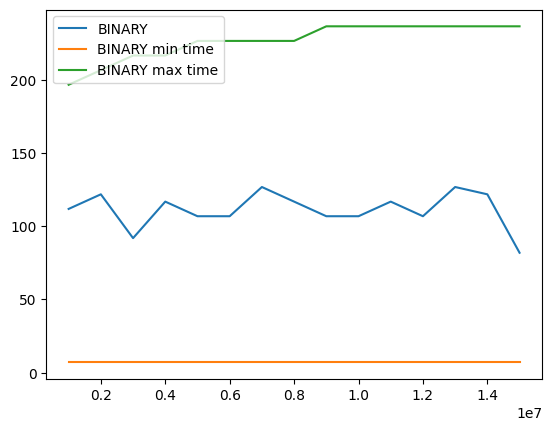

In [53]:
table_k.iloc[:, 9:12].plot()

<Axes: >

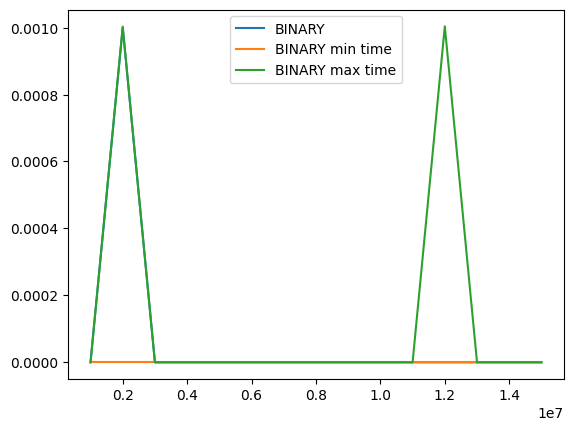

In [54]:
table_time.iloc[:, 9:12].plot()

In [55]:
table_time.iloc[:, 9:12]

,BINARY,BINARY min time,BINARY max time
1000000,0.000,0.0,0.000000
2000000,0.001,0.0,0.001003
3000000,0.000,0.0,0.000000
4000000,0.000,0.0,0.000000
5000000,0.000,0.0,0.000000
6000000,0.000,0.0,0.000000
7000000,0.000,0.0,0.000000
8000000,0.000,0.0,0.000000
9000000,0.000,0.0,0.000000
10000000,0.000,0.0,0.000000


Блочный

In [28]:
accuracy = []

for i in range(1000000, 15000001, 1000000):
    n = 1000
    array_2_3 = np.random.randint(100000, size=i)
    array_2_3 = np.sort(array_2_3)
    s = time.time()
    index_2_3, k = search_2_3(array_2_3, n)
    f = time.time()
    accuracy.append(array_2_3[index_2_3] == n)
    table_k.loc[:, 'BLOCKY'] = k
    table_time.loc[:, 'BLOCKY'] = f - s

    n = 0
    array_2_3[0] = 0
    s = time.time()
    index_2_3_min, k = search_2_3(array_2_3, n)
    f = time.time()
    accuracy.append(array_2_3[index_2_3_min] == n)
    table_k.loc[:, 'BLOCKY min time'] = k
    table_time.loc[:, 'BLOCKY min time'] = f - s

    n = 10001
    array_2_3[-1] = n
    s = time.time()
    index_2_3_max, k = search_2_3(array_2_3, n)
    f = time.time()
    accuracy.append(array_2_3[index_2_3_max] == n)
    table_k.loc[:, 'BLOCKY max time'] = k
    table_time.loc[:, 'BLOCKY max time'] = f - s
accuracy = np.array(accuracy)
accuracy.mean()

1.0

<Axes: >

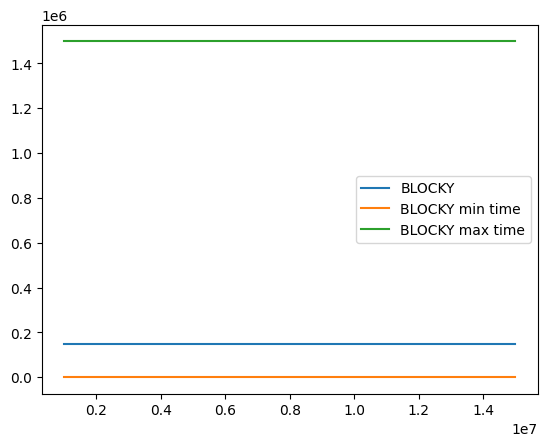

In [29]:
table_k.iloc[:, 12:].plot()

<Axes: >

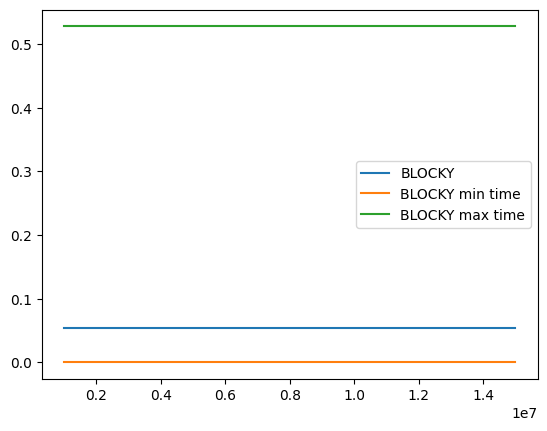

In [30]:
table_time.iloc[:, 12:].plot()

In [31]:
table_k.iloc[:, 12:]

,BLOCKY,BLOCKY min time,BLOCKY max time
1000000,149689.0,51.0,1498924.0
2000000,149689.0,51.0,1498924.0
3000000,149689.0,51.0,1498924.0
4000000,149689.0,51.0,1498924.0
5000000,149689.0,51.0,1498924.0
6000000,149689.0,51.0,1498924.0
7000000,149689.0,51.0,1498924.0
8000000,149689.0,51.0,1498924.0
9000000,149689.0,51.0,1498924.0
10000000,149689.0,51.0,1498924.0


In [23]:
table_time.iloc[:, 12:]

,BLOCKY,BLOCKY min time,BLOCKY max time
1000000,0.049995,0.0,0.0
2000000,0.049995,0.0,0.0
3000000,0.049995,0.0,0.0
4000000,0.049995,0.0,0.0
5000000,0.049995,0.0,0.0
6000000,0.049995,0.0,0.0
7000000,0.049995,0.0,0.0
8000000,0.049995,0.0,0.0
9000000,0.049995,0.0,0.0
10000000,0.049995,0.0,0.0


Итог

In [32]:
table_time

,LINEAR(non sorted),LINEAR min time(non sorted),LINEAR max time(non sorted),BLOCK LINEAR(non sorted),BLOCK LINEAR min time(non sorted),BLOCK LINEAR max time(non sorted),FAST LINEAR,FAST LINEAR min time,FAST LINEAR max time,BINARY,BINARY min time,BINARY max time,BLOCKY,BLOCKY min time,BLOCKY max time
1000000,0.078032,0.0,0.413093,0.013004,0.001010,0.482109,0.006021,0.0,0.641129,0.000,0.0,0.000,0.054014,0.0,0.528136
2000000,0.036017,0.0,0.811815,0.051016,0.003000,0.985349,0.013004,0.0,1.279571,0.000,0.0,0.000,0.054014,0.0,0.528136
3000000,0.012002,0.0,1.234027,0.099023,0.004001,1.493726,0.020006,0.0,2.101110,0.000,0.0,0.000,0.054014,0.0,0.528136
4000000,0.081004,0.0,1.646780,0.017004,0.006019,1.982570,0.026019,0.0,2.691996,0.000,0.0,0.000,0.054014,0.0,0.528136
5000000,0.028020,0.0,2.086007,0.060009,0.006006,2.479825,0.032012,0.0,3.210732,0.000,0.0,0.000,0.054014,0.0,0.528136
6000000,0.099412,0.0,2.464327,0.012001,0.008002,3.030309,0.039227,0.0,3.888638,0.000,0.0,0.000,0.054014,0.0,0.528136
7000000,0.053013,0.0,2.861974,0.133046,0.008006,3.568898,0.042014,0.0,4.549342,0.000,0.0,0.000,0.054014,0.0,0.528136
8000000,0.006000,0.0,3.278486,0.070040,0.009001,4.074293,0.051010,0.0,5.261823,0.000,0.0,0.000,0.054014,0.0,0.528136
9000000,0.029006,0.0,3.728497,0.029991,0.011002,4.463014,0.056993,0.0,5.918960,0.000,0.0,0.000,0.054014,0.0,0.528136
10000000,0.007005,0.0,4.084787,0.058993,0.012002,4.845766,0.061032,0.0,6.525587,0.000,0.0,0.000,0.054014,0.0,0.528136


In [33]:
table_k

,LINEAR(non sorted),LINEAR min time(non sorted),LINEAR max time(non sorted),BLOCK LINEAR(non sorted),BLOCK LINEAR min time(non sorted),BLOCK LINEAR max time(non sorted),FAST LINEAR,FAST LINEAR min time,FAST LINEAR max time,BINARY,BINARY min time,BINARY max time,BLOCKY,BLOCKY min time,BLOCKY max time
1000000,792181.0,7.0,6000001.0,38182.0,4.0,2000002.0,9950.0,5.0,1000004.0,122.0,7.0,197.0,149689.0,51.0,1498924.0
2000000,371059.0,7.0,12000001.0,170836.0,4.0,4000002.0,19737.0,5.0,2000004.0,117.0,7.0,207.0,149689.0,51.0,1498924.0
3000000,131137.0,7.0,18000001.0,320290.0,4.0,6000002.0,30207.0,5.0,3000004.0,107.0,7.0,217.0,149689.0,51.0,1498924.0
4000000,832405.0,7.0,24000001.0,41814.0,4.0,8000002.0,40062.0,5.0,4000004.0,107.0,7.0,217.0,149689.0,51.0,1498924.0
5000000,401875.0,7.0,30000001.0,231396.0,4.0,10000002.0,50079.0,5.0,5000004.0,107.0,7.0,227.0,149689.0,51.0,1498924.0
6000000,1456639.0,7.0,36000001.0,20590.0,4.0,12000002.0,60154.0,5.0,6000004.0,107.0,7.0,227.0,149689.0,51.0,1498924.0
7000000,748963.0,7.0,42000001.0,509410.0,4.0,14000002.0,69824.0,5.0,7000004.0,117.0,7.0,227.0,149689.0,51.0,1498924.0
8000000,84757.0,7.0,48000001.0,231786.0,4.0,16000002.0,79802.0,5.0,8000004.0,117.0,7.0,227.0,149689.0,51.0,1498924.0
9000000,400837.0,7.0,54000001.0,83870.0,4.0,18000002.0,89722.0,5.0,9000004.0,97.0,7.0,237.0,149689.0,51.0,1498924.0
10000000,107779.0,7.0,60000001.0,198704.0,4.0,20000002.0,100327.0,5.0,10000004.0,97.0,7.0,237.0,149689.0,51.0,1498924.0


Работу алгоритма быстрого поиска и блочного поиска проиллюстрировать в отдельном отчете на примере массива из 15 элементов. Расчеты в этом случае проводятся вручную.

In [37]:
test = [i for i in range(100)]
print(blocks(test, n_blocks=10)[0])
n = 10
search_2_3(test, n, n_block=10)[0]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]


10

In [35]:
n = 10
search_2_1(test, n)[0]

10